#CONVOLUTION NETWORKS (CONVNETS) TO IMAGE DATA

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harinipadmaja","key":"dc0cf68227163d3d0c8e5351a5a9999f"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:22<00:00, 25.6MB/s]
100% 812M/812M [00:22<00:00, 37.2MB/s]


In [4]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

Q1. Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?

In [5]:
#Importing libraries and creating directories

import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small1")

In [9]:
# Creating subsets for train, validation and test data.

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

make_subset("train", start_index=3000, end_index=4000)
make_subset("validation", start_index=4000, end_index=4500)
make_subset("test", start_index=4500, end_index=5000)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
i_1 = keras.Input(shape=(180, 180, 3))
p = layers.Rescaling(1./255)(i_1)
p = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(p)
p = layers.MaxPooling2D(pool_size=2)(p)
p = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(p)
p = layers.MaxPooling2D(pool_size=2)(p)
p = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(p)
p = layers.MaxPooling2D(pool_size=2)(p)
p = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(p)
p = layers.MaxPooling2D(pool_size=2)(p)
p = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(p)
p = layers.Flatten()(p)
o_1 = layers.Dense(1, activation="sigmoid")(p)
model1 = keras.Model(inputs=i_1, outputs=o_1)

In [12]:
#Summary of model1
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [29]:
#Model configuration using Binary-crossentrophy

model1.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])


In [14]:

from tensorflow.keras.utils import image_dataset_from_directory

# Flow training images in batches from the train directory
train_data = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32
)

# Flow validation images in batches from the validation directory
validation_data = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32
)

# Flow test images in batches from the test directory
test_data = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [15]:
#Creating a Tensorflow dataset using NumPy array

import numpy as np
import tensorflow as tf

random_num = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_num)

In [16]:
#Creating the dataset

for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [17]:
#batching the dataset

batched_data = dataset.batch(32)
for i, element in enumerate(batched_data):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [18]:
#Reshaping the dataset

reshaped_data = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_data):
    print(element.shape)
    if i >= 2:
        break


(4, 4)
(4, 4)
(4, 4)


In [19]:
#Printing data batch and labels batch shapes

for data_batch, labels_batch in train_data:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [20]:
#Model fitting

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

In [30]:
history1 = model1.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=callbacks
)

Epoch 1/20
63/63 [==============================] - 3s 24ms/step - loss: 0.0181 - accuracy: 0.9945 - val_loss: 2.3974 - val_accuracy: 0.7410
Epoch 2/20
63/63 [==============================] - 1s 22ms/step - loss: 0.0138 - accuracy: 0.9965 - val_loss: 3.1074 - val_accuracy: 0.7180
Epoch 3/20
63/63 [==============================] - 1s 22ms/step - loss: 0.0140 - accuracy: 0.9960 - val_loss: 2.5492 - val_accuracy: 0.7500
Epoch 4/20
63/63 [==============================] - 2s 23ms/step - loss: 0.0237 - accuracy: 0.9915 - val_loss: 2.6570 - val_accuracy: 0.7220
Epoch 5/20
63/63 [==============================] - 1s 22ms/step - loss: 0.0127 - accuracy: 0.9970 - val_loss: 3.4217 - val_accuracy: 0.7020
Epoch 6/20
63/63 [==============================] - 1s 21ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 3.2598 - val_accuracy: 0.7030
Epoch 7/20
63/63 [==============================] - 1s 21ms/step - loss: 0.0278 - accuracy: 0.9930 - val_loss: 3.1000 - val_accuracy: 0.7240
Epoch 8/20
63

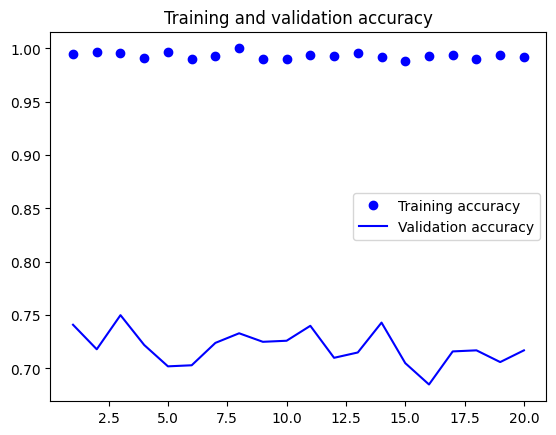

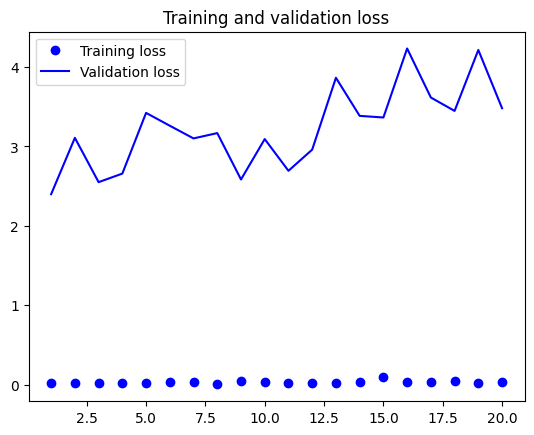

In [31]:
#Plotting accuracies and losses for training and validation data

import matplotlib.pyplot as plt
accuracy = history1.history["accuracy"]
val_accuracy = history1.history["val_accuracy"]
loss = history1.history["loss"]
val_loss = history1.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [33]:
#Evaluating the test accuracy
test_model1 = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model1.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 10ms/step - loss: 0.6071 - binary_accuracy: 0.7430
Test accuracy: 0.743


Q2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?

In [52]:
#Creating Directories

import os, shutil, pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small2")

In [53]:
#Creating subsets for train, valid and test datasets

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)


In [54]:
make_subset("train", start_index=3000, end_index=4500)
make_subset("validation", start_index=4500, end_index=5000)
make_subset("test", start_index=5000, end_index=5500)

In [55]:
#Defining data augmentation for adding image model

data_aug1 = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

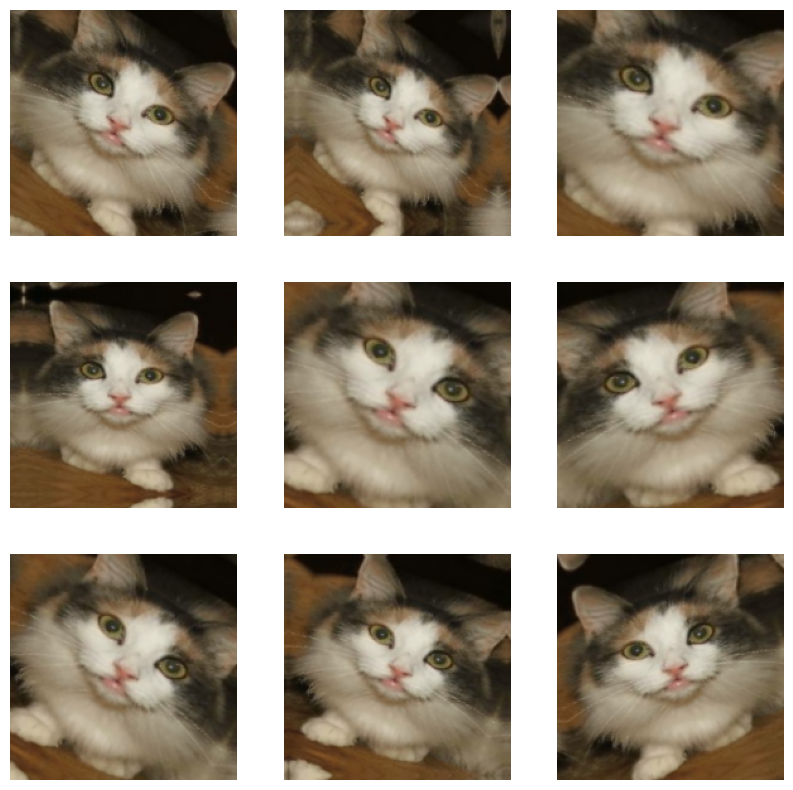

In [56]:
#Displaying random images

plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
    for i in range(9):
        augmented_images = data_aug1(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [57]:
#Defining new convolution network

i_2 = keras.Input(shape=(180, 180, 3))
x = data_aug1(i_2)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
o_2 = layers.Dense(1, activation="sigmoid")(x)
model2 = keras.Model(inputs=i_2, outputs=o_2)
model2.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [61]:
#Training a regularized convnet

callbacks2 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]


In [62]:
history2 = model2.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=callbacks2
)


Epoch 1/20
63/63 [==============================] - 2s 24ms/step - loss: 0.5004 - accuracy: 0.7610 - val_loss: 0.5095 - val_accuracy: 0.7830
Epoch 2/20
63/63 [==============================] - 2s 24ms/step - loss: 0.5134 - accuracy: 0.7475 - val_loss: 0.5092 - val_accuracy: 0.7590
Epoch 3/20
63/63 [==============================] - 2s 23ms/step - loss: 0.4898 - accuracy: 0.7690 - val_loss: 0.5962 - val_accuracy: 0.7180
Epoch 4/20
63/63 [==============================] - 2s 25ms/step - loss: 0.4975 - accuracy: 0.7575 - val_loss: 0.4869 - val_accuracy: 0.7740
Epoch 5/20
63/63 [==============================] - 2s 24ms/step - loss: 0.4798 - accuracy: 0.7790 - val_loss: 0.5260 - val_accuracy: 0.7580
Epoch 6/20
63/63 [==============================] - 2s 25ms/step - loss: 0.4692 - accuracy: 0.7810 - val_loss: 0.4531 - val_accuracy: 0.8090
Epoch 7/20
63/63 [==============================] - 1s 22ms/step - loss: 0.4583 - accuracy: 0.7840 - val_loss: 0.4821 - val_accuracy: 0.7690
Epoch 8/20
63

In [63]:
#Evaluating test accuracy from test dataset

test_model2 = keras.models.load_model("convnet_with_augmentation.keras")
test_loss, test_acc = test_model2.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")


32/32 [==============================] - 1s 9ms/step - loss: 0.4504 - accuracy: 0.8090
Test accuracy: 0.809


Q3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.

In [64]:
# Creating Directories

import os, shutil, pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small3")

In [65]:
#Creating subsets for training, valid and test datasets

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)


In [66]:
make_subset("train", start_index=3000, end_index=5000)
make_subset("validation", start_index=5000, end_index=5500)
make_subset("test", start_index=5500, end_index=6000)

In [67]:
#Creating new convnet

i_3 = keras.Input(shape=(180, 180, 3))
x = data_aug1(i_3)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
o_3 = layers.Dense(1, activation="sigmoid")(x)
model3 = keras.Model(inputs=i_3, outputs=o_3)


model3.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [68]:
#Training the Regularized Convnet

callbacks3 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]
history3 = model3.fit(
    train_data,
    epochs=30,
    validation_data=validation_data,
    callbacks=callbacks3
)

Epoch 1/30
63/63 [==============================] - 3s 28ms/step - loss: 0.6968 - accuracy: 0.5055 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 2s 25ms/step - loss: 0.6936 - accuracy: 0.5050 - val_loss: 0.6895 - val_accuracy: 0.4990
Epoch 3/30
63/63 [==============================] - 2s 24ms/step - loss: 0.6929 - accuracy: 0.5345 - val_loss: 0.6778 - val_accuracy: 0.5810
Epoch 4/30
63/63 [==============================] - 2s 24ms/step - loss: 0.6887 - accuracy: 0.5905 - val_loss: 0.6679 - val_accuracy: 0.5430
Epoch 5/30
63/63 [==============================] - 2s 24ms/step - loss: 0.6635 - accuracy: 0.5920 - val_loss: 0.6091 - val_accuracy: 0.6800
Epoch 6/30
63/63 [==============================] - 1s 22ms/step - loss: 0.6624 - accuracy: 0.6145 - val_loss: 0.6273 - val_accuracy: 0.6690
Epoch 7/30
63/63 [==============================] - 1s 22ms/step - loss: 0.6444 - accuracy: 0.6295 - val_loss: 0.6242 - val_accuracy: 0.6360
Epoch 8/30
63

In [69]:
#Evaluating test dataset

test_model3 = keras.models.load_model("convnet_with_augmentation.keras")
test_loss, test_acc = test_model3.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")


32/32 [==============================] - 1s 9ms/step - loss: 0.5023 - accuracy: 0.7800
Test accuracy: 0.780


Q4. Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance.

In [70]:
#Instantiating the VGG16 convolutional base

convolution_vgg16 = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [71]:
convolution_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

Pretrained model using FEATURE EXTRACTION

In [72]:
#Using a pretrained model VGG16 and extracting features from the Images

import numpy as np
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = convolution_vgg16.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_data)
val_features, val_labels = get_features_and_labels(validation_data)
test_features, test_labels = get_features_and_labels(test_data)

1/1 [==============================] - 0s 20ms/step


In [73]:
#Configuring the model

i_4 = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(i_4)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
o_4 = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(i_4, o_4)

model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [74]:
#Training the regularized convnet

callbacks5 = [
 keras.callbacks.ModelCheckpoint(
 filepath="feature_extraction.keras",
 save_best_only=True,
 monitor="val_loss")
]
history5 = model.fit(
 train_features, train_labels,
 epochs=20,
 validation_data=(val_features, val_labels),
 callbacks=callbacks5)

Epoch 1/20
63/63 [==============================] - 1s 9ms/step - loss: 21.4966 - accuracy: 0.9225 - val_loss: 5.2459 - val_accuracy: 0.9690
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 3.3125 - accuracy: 0.9780 - val_loss: 4.6651 - val_accuracy: 0.9790
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 2.0720 - accuracy: 0.9830 - val_loss: 7.6772 - val_accuracy: 0.9690
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 1.0627 - accuracy: 0.9900 - val_loss: 6.9449 - val_accuracy: 0.9700
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 1.0060 - accuracy: 0.9910 - val_loss: 10.7207 - val_accuracy: 0.9610
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 0.5462 - accuracy: 0.9965 - val_loss: 8.6220 - val_accuracy: 0.9700
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 0.9919 - accuracy: 0.9935 - val_loss: 8.3145 - val_accuracy: 0.9760
Epoch 8/20
63/63 [

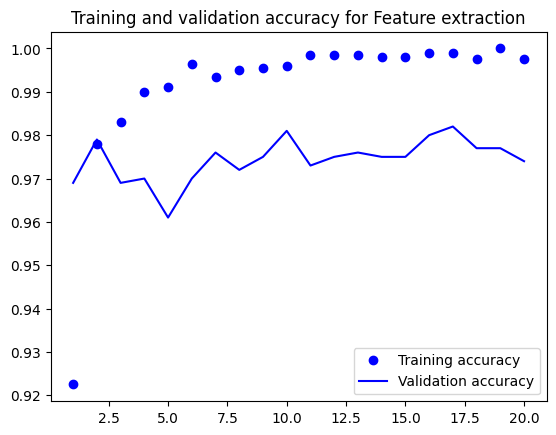

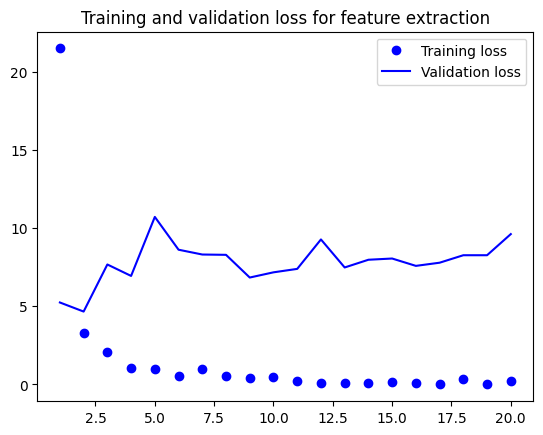

In [75]:
#Displaying the accuracy and losses using plots

import matplotlib.pyplot as plt
acc = history5.history["accuracy"]
val_acc = history5.history["val_accuracy"]
loss = history5.history["loss"]
val_loss = history5.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy for Feature extraction")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss for feature extraction")
plt.legend()
plt.show()

In [76]:
#Freezing layers

convolution_vgg16 = keras.applications.vgg16.VGG16(weights="imagenet",include_top=False)
convolution_vgg16.trainable = False

convolution_vgg16.trainable = True
for layer in convolution_vgg16.layers[:-4]:
 layer.trainable = False

Pretrained model using FINE TUNING

with 1000 samples

In [78]:
#Defining data augmentation

data_aug2 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.3),
        layers.RandomZoom(0.5),
    ]
)

In [79]:
i_5 = keras.Input(shape=(180, 180, 3))
x = data_aug2(i_5)
x = keras.layers.Lambda(lambda x: keras.applications.vgg16.preprocess_input(x))(x)
x = convolution_vgg16(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
o_5 = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(i_5, o_5)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])


In [80]:
#Training regularized convnet
callbacks_ft1 = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history_ft1 = model.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=callbacks_ft1)

Epoch 1/20
63/63 [==============================] - 6s 65ms/step - loss: 4.2743 - accuracy: 0.6730 - val_loss: 0.6387 - val_accuracy: 0.9200
Epoch 2/20
63/63 [==============================] - 4s 61ms/step - loss: 1.4630 - accuracy: 0.7575 - val_loss: 0.3331 - val_accuracy: 0.9410
Epoch 3/20
63/63 [==============================] - 4s 62ms/step - loss: 0.8462 - accuracy: 0.7875 - val_loss: 0.2609 - val_accuracy: 0.9430
Epoch 4/20
63/63 [==============================] - 4s 61ms/step - loss: 0.5702 - accuracy: 0.8300 - val_loss: 0.2102 - val_accuracy: 0.9470
Epoch 5/20
63/63 [==============================] - 4s 61ms/step - loss: 0.4863 - accuracy: 0.8295 - val_loss: 0.1685 - val_accuracy: 0.9540
Epoch 6/20
63/63 [==============================] - 4s 61ms/step - loss: 0.4135 - accuracy: 0.8365 - val_loss: 0.1457 - val_accuracy: 0.9590
Epoch 7/20
63/63 [==============================] - 3s 53ms/step - loss: 0.3439 - accuracy: 0.8595 - val_loss: 0.1558 - val_accuracy: 0.9580
Epoch 8/20
63

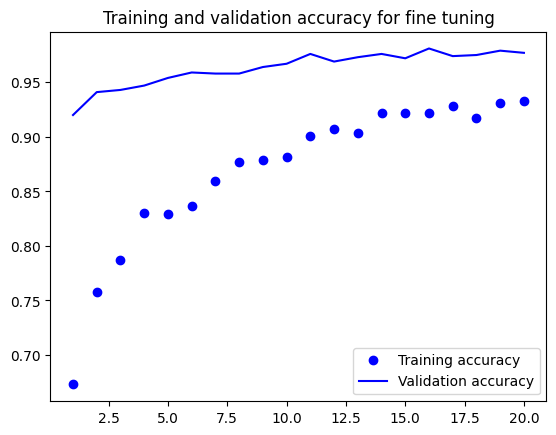

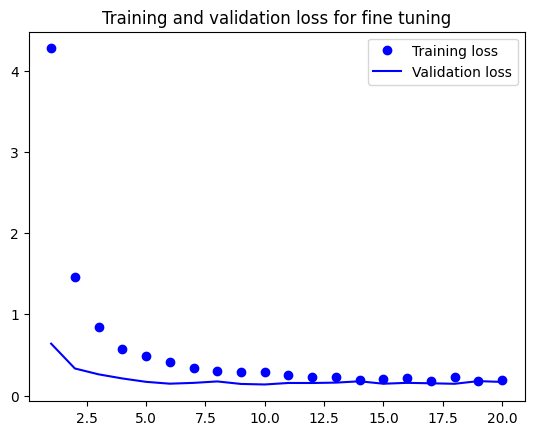

In [81]:
#Displaying accuracy and loss using fine tuning

import matplotlib.pyplot as plt
accuracy = history_ft1.history["accuracy"]
val_accuracy = history_ft1.history["val_accuracy"]
loss = history_ft1.history["loss"]
val_loss = history_ft1.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy for fine tuning")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss for fine tuning")
plt.legend()
plt.show()

In [82]:
#Evaluating test accuracy

model_ft1 = keras.models.load_model("fine_tuning.keras", safe_mode=False)
test_loss, test_acc = model_ft1.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 32ms/step - loss: 0.1521 - accuracy: 0.9580
Test accuracy: 0.958


Pretrained model with 8000 samples

In [83]:
#Pretrained model with 8000 samples
conv2_vgg16 = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [84]:
#Freezing layers

conv2_vgg16  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv2_vgg16.trainable = True
for layer in conv2_vgg16.layers[:-4]:
    layer.trainable = False


In [85]:
#Adding augmentation and classifier to the vgg16 convolution

data_aug_ft2 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

i_ft2 = keras.Input(shape=(180, 180, 3))
x = data_aug_ft2(i_ft2)
x = keras.layers.Lambda(lambda x: keras.applications.vgg16.preprocess_input(x))(x)
x = conv2_vgg16(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
o_ft2 = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(i_ft2, o_ft2)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks_ft2 = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history_ft2 = model.fit(
    train_data,
    epochs=10,
    validation_data=validation_data,
    callbacks=callbacks_ft2)

Epoch 1/10
63/63 [==============================] - 6s 64ms/step - loss: 3.3911 - accuracy: 0.7540 - val_loss: 0.6048 - val_accuracy: 0.9360
Epoch 2/10
63/63 [==============================] - 4s 62ms/step - loss: 1.0722 - accuracy: 0.8835 - val_loss: 0.3259 - val_accuracy: 0.9480
Epoch 3/10
63/63 [==============================] - 4s 61ms/step - loss: 0.6237 - accuracy: 0.9150 - val_loss: 0.2861 - val_accuracy: 0.9590
Epoch 4/10
63/63 [==============================] - 4s 61ms/step - loss: 0.4036 - accuracy: 0.9365 - val_loss: 0.2524 - val_accuracy: 0.9700
Epoch 5/10
63/63 [==============================] - 4s 61ms/step - loss: 0.3257 - accuracy: 0.9390 - val_loss: 0.1996 - val_accuracy: 0.9710
Epoch 6/10
63/63 [==============================] - 3s 53ms/step - loss: 0.2182 - accuracy: 0.9545 - val_loss: 0.2061 - val_accuracy: 0.9730
Epoch 7/10
63/63 [==============================] - 4s 61ms/step - loss: 0.2111 - accuracy: 0.9555 - val_loss: 0.1909 - val_accuracy: 0.9720
Epoch 8/10
63

In [87]:
#Evaluating test accuracy

model_ft2 = keras.models.load_model("fine_tuning2.keras", safe_mode = False)
test_loss, test_acc = model_ft2.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.1707 - accuracy: 0.9650
Test accuracy: 0.965


Pretrained model with 10,000 samples

In [88]:
#Pre-trained model with 10000 samples
conv2_vgg16  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [89]:
#Fine tuning the pretrained model and freezing the layers

conv2_vgg16  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv2_vgg16.trainable = True
for layer in conv2_vgg16.layers[:-4]:
    layer.trainable = False

In [92]:
#adding augmentation and classifier to the vgg16 convolution

data_aug_ft3 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

i_ft3 = keras.Input(shape=(180, 180, 3))
x = data_aug_ft3(i_ft3)
x = keras.layers.Lambda(lambda x: keras.applications.vgg16.preprocess_input(x))(x)
x = conv2_vgg16(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
o_ft3 = layers.Dense(1, activation="sigmoid")(x)
model_ft3 = keras.Model(i_ft3, o_ft3)
model_ft3.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks_ft3 = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model_ft3.fit(
    train_data,
    epochs=10,
    validation_data=validation_data,
    callbacks=callbacks_ft3)

Epoch 1/10
63/63 [==============================] - 6s 63ms/step - loss: 1.0979 - accuracy: 0.6985 - val_loss: 0.2308 - val_accuracy: 0.9000
Epoch 2/10
63/63 [==============================] - 4s 61ms/step - loss: 0.2667 - accuracy: 0.8740 - val_loss: 0.1584 - val_accuracy: 0.9430
Epoch 3/10
63/63 [==============================] - 4s 62ms/step - loss: 0.2104 - accuracy: 0.9160 - val_loss: 0.1223 - val_accuracy: 0.9610
Epoch 4/10
63/63 [==============================] - 4s 61ms/step - loss: 0.1531 - accuracy: 0.9330 - val_loss: 0.1196 - val_accuracy: 0.9650
Epoch 5/10
63/63 [==============================] - 4s 61ms/step - loss: 0.1283 - accuracy: 0.9495 - val_loss: 0.1162 - val_accuracy: 0.9660
Epoch 6/10
63/63 [==============================] - 4s 60ms/step - loss: 0.1102 - accuracy: 0.9560 - val_loss: 0.1103 - val_accuracy: 0.9720
Epoch 7/10
63/63 [==============================] - 3s 54ms/step - loss: 0.1015 - accuracy: 0.9590 - val_loss: 0.1131 - val_accuracy: 0.9710
Epoch 8/10
63

In [93]:
#Evaluating test accuracy

model_ft3 = keras.models.load_model("fine_tuning3.keras", safe_mode = False)
test_loss, test_acc = model_ft3.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 0.1410 - accuracy: 0.9610
Test accuracy: 0.961
